[<matplotlib.text.Text at 0x10999ba90>, <matplotlib.text.Text at 0x10999bad0>]

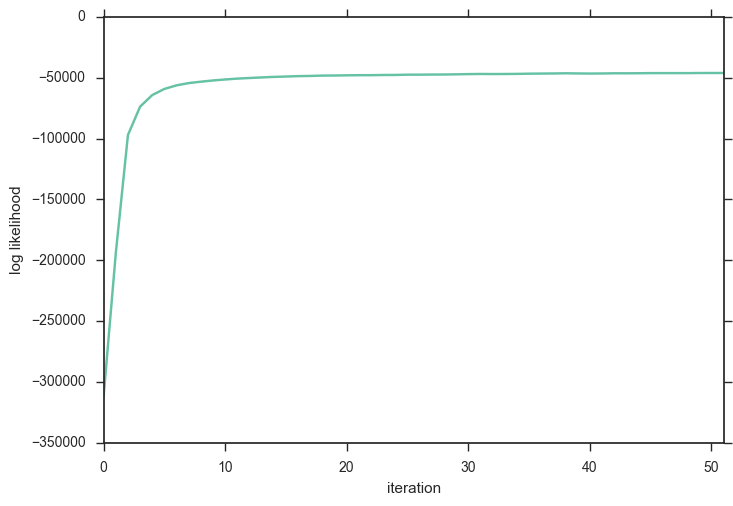

In [135]:
%matplotlib inline
import pandas as pd
trace = pd.read_csv("sampler.log", delimiter="\t", header=None)
trace.columns = ["time", "iter", "ll"]
import seaborn as sns
sns.set(style='ticks', palette='Set2')
sns.despine()
ax = sns.tsplot(trace["ll"])
ax.set(xlabel='iteration', ylabel='log likelihood')

In [166]:
model_legislator_index = pd.read_csv("model_legislator_index.df")
model_vote_index = pd.read_csv("model_vote_index.df")
legislator_df = pd.read_csv("legislator_df.df")
position_df = pd.read_csv("position_df.df")
vote_df = pd.read_csv("vote_df.df")

In [167]:
import glob
import numpy as np
BURNIN = 30
files = glob.glob("trace/leg_*")

def get_trace():
    for f in files:
        iter_ = f.split("_")[1]
        if int(iter_) > BURNIN:
            tracei = pd.read_csv(f, delimiter=",")#, header=None)
            tracei["iter"] = iter_
            yield tracei

leg_traces = pd.concat(get_trace())
groupby_object = leg_traces.groupby(['legislator'])
leg_means = groupby_object.aggregate(np.mean)

leg_means = leg_means.sort(["theta"], ascending=False)

print leg_means.head(10)
#print leg_means.head()

def check():
    # 2x checking pandas....
    rr = pd.concat(get_trace())
    rr = rr.query("legislator==0")
    print rr["theta"].mean()


            Unnamed: 0     theta
legislator                      
527                498  1.791571
212                330  1.644155
83                 255  1.613269
456                373  1.606941
311                388  1.600849
209                328  1.597709
364                424  1.596578
398                334  1.590190
120                280  1.585669
46                 234  1.574607


/Library/Python/2.7/site-packages/ipykernel/__main__.py:18: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [153]:
# print model_legislator_index
# print legislator_df.shape

In [134]:
import glob
BURNIN = 30
files = glob.glob("trace/votes_*")

def get_trace():
    for f in files:
        iter_ = f.split("_")[1]
        if int(iter_) > BURNIN:
            tracei = pd.read_csv(f, delimiter=",")#, header=None)
            tracei.columns=["ix", "vote", "alpha", "beta"]
            tracei["iter"] = iter_
            yield tracei

votes_trace = pd.concat(get_trace())
votes_trace.head()
votes_trace_groupby_object = votes_trace.groupby(['vote'])
vote_means = votes_trace_groupby_object.aggregate(np.mean)
model_vote_index.columns = ["ix", "real"] # assuming 1st column is index and second is real
votes = model_vote_index.merge(vote_means, on="ix")
tmp = [o for o in vote_df.columns]
tmp[0] = "ix"
vote_df.columns = tmp
votes = votes.merge(vote_df, on="ix")
votes.sort(["alpha"])


/Library/Python/2.7/site-packages/ipykernel/__main__.py:24: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,ix,real,alpha,beta,amendment_author,amendment_number,amendment_purpose,amendment_type,bill_congress,bill_number,...,record_modified,requires,result,result_text,session,source_url,subject,type,updated_at,vote_id
857,858,1012,-2.691081,0.022561,NaN,NaN,NaN,NaN,NaN,NaN,...,2013-03-07T15:59:00-05:00,1/2,Nomination Confirmed,Nomination Confirmed (63-34),2013,http://www.senate.gov/legislative/LIS/roll_cal...,"Confirmation John Owen Brennan, of Virginia, t...",On the Nomination,2014-06-18T11:22:44-04:00,s32-113.2013
592,593,626,-2.500057,-2.356487,NaN,NaN,NaN,NaN,113.0,2319.0,...,NaN,2/3,Passed,Passed,2013,http://clerk.house.gov/evs/2013/roll633.xml,To clarify certain provisions of the Native Am...,"On Motion to Suspend the Rules and Pass, as Am...",2014-06-18T11:20:46-04:00,h633-113.2013
750,751,898,-2.022801,-1.556171,NaN,NaN,NaN,NaN,113.0,1243.0,...,2013-08-01T18:23:00-04:00,3/5,Cloture Motion Rejected,"Cloture Motion Rejected (54-43, 3/5 majority r...",2013,http://www.senate.gov/legislative/LIS/roll_cal...,Motion to Invoke Cloture on S. 1243,On the Cloture Motion,2014-06-18T11:22:30-04:00,s199-113.2013
631,632,677,-1.852329,1.798887,NaN,NaN,NaN,NaN,113.0,1033.0,...,NaN,2/3,Passed,Passed,2013,http://clerk.house.gov/evs/2013/roll091.xml,To authorize the acquisition and protection of...,On Motion to Suspend the Rules and Pass,2014-06-18T11:22:06-04:00,h91-113.2013
591,592,625,-1.806143,1.461481,NaN,NaN,NaN,NaN,113.0,2019.0,...,NaN,2/3,Passed,Passed,2013,http://clerk.house.gov/evs/2013/roll632.xml,Gabriella Miller Kids First Research Act,"On Motion to Suspend the Rules and Pass, as Am...",2014-06-18T11:20:47-04:00,h632-113.2013
861,862,1016,-1.795600,-1.998676,NaN,53.0,Of a perfecting nature.,s,113.0,933.0,...,2013-03-14T12:07:00-04:00,3/5,Amendment Rejected,"Amendment Rejected (54-45, 3/5 majority required)",2013,http://www.senate.gov/legislative/LIS/roll_cal...,Harkin Amdt. No. 53,On the Amendment,2014-06-18T11:22:44-04:00,s36-113.2013
972,973,1130,-1.781621,-1.999498,NaN,NaN,NaN,NaN,113.0,3060.0,...,NaN,2/3,Passed,Passed,2014,http://clerk.house.gov/evs/2014/roll136.xml,Sergeant William Moody Post Office Building in...,On Motion to Suspend the Rules and Pass,2014-06-18T11:23:30-04:00,h136-113.2014
673,674,735,-1.777592,2.121467,NaN,919.0,To allow Indian tribes to participate in certa...,s,113.0,954.0,...,2013-05-21T12:41:00-04:00,1/2,Amendment Agreed to,Amendment Agreed to (87-8),2013,http://www.senate.gov/legislative/LIS/roll_cal...,Cantwell Amdt. No. 919,On the Amendment,2014-06-18T11:22:35-04:00,s129-113.2013
135,136,146,-1.772641,1.121480,NaN,NaN,NaN,NaN,113.0,260.0,...,NaN,1/2,Passed,Passed,2013,http://clerk.house.gov/evs/2013/roll221.xml,Providing for further consideration of the bil...,On the Resolution,2014-06-18T11:21:52-04:00,h221-113.2013
934,935,1092,-1.733957,-1.892114,Smith of Texas Amendment No. 1,1.0,NaN,h-bill,113.0,3826.0,...,NaN,1/2,Agreed to,Agreed to,2014,http://clerk.house.gov/evs/2014/roll101.xml,NaN,On the Amendment,2014-06-18T11:23:34-04:00,h101-113.2014


In [161]:
legislator_df.head()

,last_name,first_name,birthday,gender,type,state,district,party,url,address,...,thomas_id,opensecrets_id,lis_id,cspan_id,govtrack_id,votesmart_id,ballotpedia_id,washington_post_id,icpsr_id,wikipedia_id
0,Brown,Sherrod,1952-11-09,M,sen,OH,NaN,Democrat,https://www.brown.senate.gov,713 Hart Senate Office Building Washington DC ...,...,136.0,N00003535,S307,5051.0,400050,27018.0,Sherrod Brown,NaN,29389.0,Sherrod Brown
1,Cantwell,Maria,1958-10-13,F,sen,WA,NaN,Democrat,https://www.cantwell.senate.gov,511 Hart Senate Office Building Washington DC ...,...,172.0,N00007836,S275,26137.0,300018,27122.0,Maria Cantwell,NaN,39310.0,Maria Cantwell
2,Cardin,Benjamin,1943-10-05,M,sen,MD,NaN,Democrat,https://www.cardin.senate.gov,509 Hart Senate Office Building Washington DC ...,...,174.0,N00001955,S308,4004.0,400064,26888.0,Ben Cardin,NaN,15408.0,Ben Cardin
3,Carper,Thomas,1947-01-23,M,sen,DE,NaN,Democrat,http://www.carper.senate.gov,513 Hart Senate Office Building Washington DC ...,...,179.0,N00012508,S277,663.0,300019,22421.0,Tom Carper,NaN,15015.0,Tom Carper
4,Casey,Robert,1960-04-13,M,sen,PA,NaN,Democrat,https://www.casey.senate.gov,393 Russell Senate Office Building Washington ...,...,1828.0,N00027503,S309,47036.0,412246,2541.0,"Bob Casey, Jr.",NaN,40703.0,Bob Casey Jr.


In [97]:
vote_means.head()

# print vote_means.sort("beta", ascending=False).head()
# print vote_df.iloc[model_vote_index.iloc[335]]

,ix,alpha,beta
vote,,,
0,0,-0.125910,2.429981
1,1,-0.299793,-2.409005
2,2,2.690764,0.190097
3,3,2.346404,0.066662
4,4,0.642945,-1.467952


In [46]:
import ideal_point.raw_data
legislator_df = ideal_point.raw_data.legislators() # validation
print legislator_df.iloc[120]
print legislator_df.iloc[46]

last_name                                                       Edwards
first_name                                                        Donna
birthday                                                     1958-06-28
gender                                                                F
type                                                                rep
state                                                                MD
district                                                              4
party                                                          Democrat
url                                       http://donnaedwards.house.gov
address                      2445 Rayburn HOB; Washington DC 20515-2004
phone                                                      202-225-8699
contact_form          https://forms.house.gov/formdonnaedwards/issue...
rss_url                         http://www.house.gov/common/rss/?rss=24
twitter                                                 RepDonna